In [7]:
import warnings
import logging
import tensorflow as tf
import pandas as pd
import numpy as np
from IPython.display import display, Image

# Ignore Python's warnings
warnings.filterwarnings('ignore')

# Ignore TensorFlow's warnings
tf.get_logger().setLevel(logging.ERROR)



In [2]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [3]:
base_dir = 'C:\\Users\\reda-\\Desktop\\X_Ray Images'

In [4]:
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
valid_dir = os.path.join(base_dir,'valid')

In [5]:
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 1) 
num_classes = 13  # Number of subfolders

In [6]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True
    
)

test_datagen = ImageDataGenerator(rescale = 1.0/255.0)

In [8]:
# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1543 images belonging to 13 classes.


In [9]:
# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = 32,
    class_mode='categorical',
    shuffle=False
)

Found 221 images belonging to 13 classes.


In [10]:
# Load testing data
valid_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size = (img_width, img_height),
    batch_size = 32,
    class_mode='categorical',
)

Found 439 images belonging to 13 classes.


In [11]:
# CNN Model
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(224, 224, 3), groups=1))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu', groups=1))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu', groups=1))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [12]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
# Train the model

model.fit(train_generator, epochs=25, validation_data=valid_generator)


Epoch 1/25
49/49 [==============================] - 40s 776ms/step - loss: 1.8458 - accuracy: 0.4750 - val_loss: 1.3727 - val_accuracy: 0.5809
Epoch 2/25
49/49 [==============================] - 52s 1s/step - loss: 1.2569 - accuracy: 0.6209 - val_loss: 0.9955 - val_accuracy: 0.7221
Epoch 3/25
49/49 [==============================] - 64s 1s/step - loss: 1.0652 - accuracy: 0.6773 - val_loss: 0.9379 - val_accuracy: 0.7517
Epoch 4/25
49/49 [==============================] - 64s 1s/step - loss: 0.9803 - accuracy: 0.7006 - val_loss: 0.8238 - val_accuracy: 0.7494
Epoch 5/25
49/49 [==============================] - 59s 1s/step - loss: 0.9252 - accuracy: 0.7181 - val_loss: 0.7863 - val_accuracy: 0.7790
Epoch 6/25
49/49 [==============================] - 62s 1s/step - loss: 0.7802 - accuracy: 0.7641 - val_loss: 0.7721 - val_accuracy: 0.7813
Epoch 7/25
49/49 [==============================] - 63s 1s/step - loss: 0.7027 - accuracy: 0.7816 - val_loss: 0.7172 - val_accuracy: 0.8064
Epoch 8/25
49/49 

In [16]:
accuracy = model.evaluate(test_generator)
print("Accuracy on test set: {:.2f}%".format(accuracy[1] * 100))

7/7 [==============================] - 2s 192ms/step - loss: 0.9705 - accuracy: 0.7964
Accuracy on test set: 79.64%


In [17]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 128)       0

In [18]:
class_labels = ["pelvis", "ankle", "spine", "neck", "elbow", "shoulder", "knee", "leg", "hand", "pectoral chest", "foot", "wrist", "head"]

In [19]:
def show_image_with_prediction(image_path, predicted_body_part):
    display(Image(filename=image_path, width=600))


7/7 [==============================] - 2s 211ms/step
Path : C:\Users\reda-\Desktop\X_Ray Images\test\pectoral poitrine\1-2-826-0-1-3680043-8-498-49569514187101813908206599366725265813-c_png_jpg.rf.da6042d889d518aa8b35e8523e7169e5.jpg
Real Label : pectoral chest
Model prediction : pectoral chest
Model confidence : 100.00%



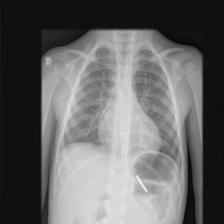

In [20]:
# Make predictions for each batch of images
predictions = model.predict(test_generator)

# Get the predicted class indices for each image
predicted_class_indices = np.argmax(predictions, axis=1)

# Get class names matching indices
predicted_class_labels = [class_labels[i] for i in predicted_class_indices]

# Get model confidence percentages for each prediction
confidence_percentages = np.max(predictions, axis=1) * 100

# Create a dataframe to store information
df_results = pd.DataFrame({
    'Image': test_generator.filepaths,
    'Real Label': [class_labels[i] for i in test_generator.classes],
    'Model prediction': predicted_class_labels,
    'Confidence (%)': confidence_percentages
})

# Select a single random image
random_row = df_results.sample()

# Display the image with its predictions and confidence percentage
image_path = random_row['Image'].values[0]
predicted_label = random_row['Model prediction'].values[0]
confidence_percentage = random_row['Confidence (%)'].values[0]

print(f"Path : {image_path}")
print(f"Real Label : {random_row['Real Label'].values[0]}")
print(f"Model prediction : {predicted_label}")
print(f"Model confidence : {confidence_percentage:.2f}%\n")
show_image_with_prediction(image_path, predicted_label)
